In [7]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
%matplotlib notebook

In [8]:
t = 0.88
def p(v, tau):
    res = -3/v**2 + ((8/3)*tau)/(v - 1/3)
    return res

<IPython.core.display.Javascript object>


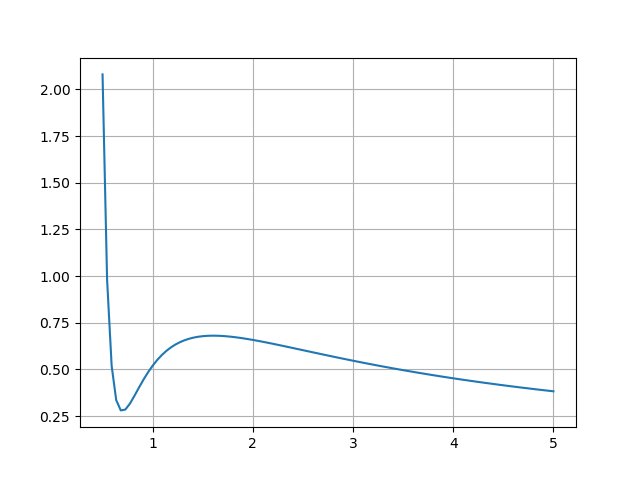

In [9]:
v = np.linspace(0.5, 5, 100)
plt.plot(v, p(v, 0.88))
plt.grid()
plt.show()

In [10]:
t = 0.88
def comp_matrix(p, tau):
    return np.asarray([[0, 0, 1/p], [1, 0, -3/p], [0, 1,(8*tau+p)/(3*p)]])
def solve_eq(p, tau):
    eig_v =  np.linalg.eig(comp_matrix(p, tau))[0]
    return eig_v

In [11]:
#p = 0.5
print(solve_eq(0.5, t), np.roots(np.asarray([0.5, -(0.5+8*t)/3, 3, -1])))

[ 0.59400403  0.97329312  3.45936952] [ 3.45936952  0.97329312  0.59400403]


In [13]:
def integration(func, t, a, b, n):
    x = np.linspace(a, b, n)
    f = np.array(func(x, t))
    b = []
    for i in range(len(x)-1):
        b.append((f[i]+f[i+1])*(x[i+1] - x[i])/2)
    return(sum(np.array(b)))
print(integration(p, 0.88, 0.6, 1.5, 1000))

0.463460989989


In [14]:
def poisk(f, tau, a, b, n):
    if integration(f, a, b, n) > 
    solve_eq(f, tau)[]
    

SyntaxError: invalid syntax (<ipython-input-14-aab2ad0d2a40>, line 2)